### Exercise 8.18

Midwestern University has 1/3 of its students taking 9 credit hours, 1/3 taking 12 credit hours, 
and 1/3 taking 15 credit hours

List all samples of size n = 2 that are possible (with replacement) from the population.
plot the sampling distribution of the mean to show that μ = μ¼, and show thatσx^ = σ^2 / 22...

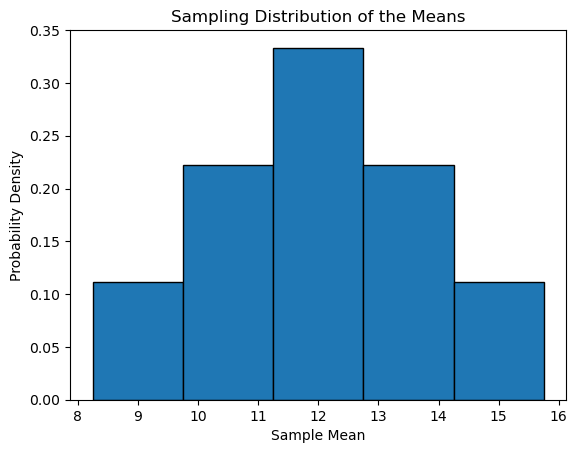

,Population Mean:,Sampling Distribution of the Means:,Population Variance:,Sampling Distribution Variance:,Theoretical Variance:
0,12.0,12.0,6.0,3.0,3.0


In [20]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from collections import Counter

population = [9, 12, 15]

samples = [(x, y) for x in population for y in population]
sample_means = [(x + y) / 2 for x, y in samples]
mean_counts = Counter(sample_means)
total_samples = len(samples)
mean_prob = {mean: count / total_samples for mean, count in mean_counts.items()}

means = list(mean_prob.keys())
prob = list(mean_prob.values())

plt.bar(means, prob, width=1.5, edgecolor='black')
plt.xlabel('Sample Mean')
plt.ylabel('Probability Density')
plt.title('Sampling Distribution of the Means')
plt.show()

mu_xbar = sum(mean * prob for mean, prob in mean_prob.items())
mu = np.mean(population)
sigma_xbar_squared = sum(((mean - mu_xbar) ** 2) * prob for mean, prob in mean_prob.items())
sigma_squared = np.var(population, ddof=0)
sigma_xbar_squared_theoretical = sigma_squared / 2

data = {
    'Population Mean: ': [mu],
    'Sampling Distribution of the Means: ': [mu_xbar], 
    'Population Variance: ': [sigma_squared], 
    'Sampling Distribution Variance: ': [sigma_xbar_squared],
    'Theoretical Variance: ': [sigma_xbar_squared_theoretical]
    
}

df = pd.DataFrame(data)
df

### Exercise 8.21

A population consists of the four numbers 3, 7, 11, and 15. Consider all possible samples of size 2 that can be drawn with replacement from this population. Find (a) the population mean, (b) the population standard deviation, (c) the mean of the sampling distribution of means, and (d ) the standard deviation of the sampling
distribution of means. Verify parts (c) and (d ) directly from (a) and (b) by using suitable formulas.

In [32]:
import numpy as np
import pandas as pd
from itertools import product

population = np.array([3, 7, 11, 15])

population_mean = np.mean(population)
population_std = np.std(population, ddof=0)
samples = list(product(population, repeat = 2))
sample_means = np.array([np.mean(sample) for sample in samples])
sampling_mean = np.mean(sample_means)
sampling_std = np.std(sample_means, ddof=0)

theoretical_se = population_std / np.sqrt(2)

sample_means_df = pd.DataFrame({'Sample Pairs': [str(sample) for sample in samples],
                               'Sample Means': sample_means})
data = {
    'Population mean:': [population_mean],
    'Population standard deviation:': [population_std],
    'Sampling Distribution of the Means:': [sampling_mean],
    'Standard deviation of the sampling distribution of the means:': [sampling_std],
    'Theoretical Standard Error:': [theoretical_se],
    
}
np.set_printoptions(precision=2, suppress=True)

df = pd.DataFrame(data)
print(sample_means_df)
df

   Sample Pairs  Sample Means
0        (3, 3)           3.0
1        (3, 7)           5.0
2       (3, 11)           7.0
3       (3, 15)           9.0
4        (7, 3)           5.0
5        (7, 7)           7.0
6       (7, 11)           9.0
7       (7, 15)          11.0
8       (11, 3)           7.0
9       (11, 7)           9.0
10     (11, 11)          11.0
11     (11, 15)          13.0
12      (15, 3)           9.0
13      (15, 7)          11.0
14     (15, 11)          13.0
15     (15, 15)          15.0


,Population mean:,Population standard deviation:,Sampling Distribution of the Means:,Standard deviation of the sampling distribution of the means:,Theoretical Standard Error:
0,9.0,4.472136,9.0,3.162278,3.162278


### Exercise 8.34

Find the probability that of the next 200 children born, (a) less than 40% will be boys, (b) between 43% and 
57% will be girls, and (c) more than 54% will be boys. Assume equal probabilities for the births of boys an 
girls.

In [44]:
import scipy.stats as stats

n = 200
p_boy = 0.5
p_girl = 0.5

prob_a = stats.binom.cdf(79, n, p_boy)
prob_b = stats.binom.cdf(114, n, p_girl) - stats.binom.cdf(85, n, p_girl)
prob_c = stats.binom.cdf(108, n, p_boy)

print(f"Probability that less than 40% will be boys: {prob_a}")
print(f"Probability that between 43% and 57% will be girls: {prob_b}")
print(f"Probability that more than 54% will be boys: {prob_c}")

Probability that less than 40% will be boys: 0.0018174739762649662
Probability that between 43% and 57% will be girls: 0.9599628083866005
Probability that more than 54% will be boys: 0.8853767013701419
